In [1]:
pip install tensorflow_hub --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "tensorflow>=2.0.0" --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install tensorflow-text --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Ashkar077/Machine-Learning-Project/main/news_articles.csv')

In [7]:
data.head(10)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
5,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0
6,Fed Up,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0
7,Fed Up,2016-11-05T01:19:00.000+02:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0
8,Fed Up,2016-11-06T23:54:00.000+02:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0
9,Fed Up,2016-11-07T02:43:00.000+02:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0


In [8]:
data['label'].value_counts()

Fake    1294
Real     801
Name: label, dtype: int64

In [9]:
data = data[['title', 'label']]

In [10]:
data['label'] = data['label'].map({'Real': 0, 'Fake':1})

In [11]:
data.head()

,title,label
0,muslims busted they stole millions in govt ben...,0.0
1,re why did attorney general loretta lynch plea...,0.0
2,breaking weiner cooperating with fbi on hillar...,0.0
3,pin drop speech by father of daughter kidnappe...,0.0
4,fantastic trumps point plan to reform healthc...,0.0


Mean Length 61.23807251908397
Min Length 2
Max Length 443


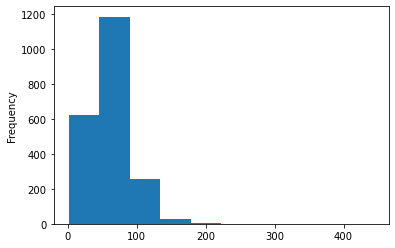

In [12]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

x = data['title'].apply(len).plot.hist()

In [14]:
titles = data["title"].values
labels = data["label"].values

In [15]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2,\
                                                            random_state=1000)

In [18]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [19]:
import tensorflow as tf

# Input Layers
input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

# BERT layers
processed = bert_preprocess(input_layer)
output = bert_encoder(processed)

# Fully Connected Layers
layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(10,activation='relu', name='hidden')(layer)
layer = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(layer)


model = tf.keras.Model(inputs=[input_layer],outputs=[layer])

In [20]:
#Compile model on adam optimizer, binary_crossentropy loss, and accuracy metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Train model on 5 epochs
model.fit(title_train, y_train, epochs= 5)

#Evaluate model on test data
model.evaluate(title_test,y_test)

Epoch 1/5
53/53 [==============================] - 279s 5s/step - loss: nan - accuracy: 0.3938
Epoch 2/5
53/53 [==============================] - 266s 5s/step - loss: nan - accuracy: 0.3777
Epoch 3/5
53/53 [==============================] - 297s 6s/step - loss: nan - accuracy: 0.3777
Epoch 4/5
53/53 [==============================] - 367s 7s/step - loss: nan - accuracy: 0.3777
Epoch 5/5
14/14 [==============================] - 96s 6s/step - loss: nan - accuracy: 0.4000


[nan, 0.4000000059604645]

In [21]:
#Compile model on adam optimizer, binary_crossentropy loss, and accuracy metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Train model on 5 epochs
model.fit(title_train, y_train, epochs= 5)

#Evaluate model on test data
model.evaluate(title_test,y_test)

Epoch 1/5
53/53 [==============================] - 267s 5s/step - loss: nan - accuracy: 0.3777
Epoch 2/5
53/53 [==============================] - 282s 5s/step - loss: nan - accuracy: 0.3777
Epoch 3/5
53/53 [==============================] - 264s 5s/step - loss: nan - accuracy: 0.3777
Epoch 4/5
53/53 [==============================] - 257s 5s/step - loss: nan - accuracy: 0.3777
Epoch 5/5
14/14 [==============================] - 67s 5s/step - loss: nan - accuracy: 0.4000


[nan, 0.4000000059604645]